<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Machine_Learning/blob/main/ML_P05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Practical No. 06</h1>
<h6> Implement Decision Tree classifier.</h6>
<p>Problem Definition: As a data analyst working for an e-commerce
company, your goal is to develop a Decision Tree Classifier to predict the
likelihood of a customer making a purchase based on their browsing
behavior. The dataset includes features like the number of visits, time
spent on the website, age group, and product categories viewed. Set up
your machine learning environment using Jupyter Notebooks or Google
Colab, and utilize Python libraries like Pandas for data handling and
Scikit-learn for model implementation. After preprocessing the data, build
the decision tree model, visualize the tree, and evaluate its performance
using accuracy and other relevant metrics.</p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = "/content/drive/MyDrive/6TH SEM/Machine Learning Lab/DRUG-200.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#Data Preprocessing
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [13]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])   # 'F' -> 0, 'M' -> 1
df['BP'] = label_encoder.fit_transform(df['BP'])     # 'HIGH' -> 2, 'LOW' -> 1, 'NORMAL' -> 0
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])  # 'HIGH' -> 0
df['Drug'] = label_encoder.fit_transform(df['Drug'])  # 'drugY' -> 2, 'drugC' -> 0, 'drugX' -> 1


In [12]:
#Split the data into features and target variable
X = df.drop('Drug', axis=1)  # Features: Age, Sex, BP, Cholesterol, Na_to_K
y = df['Drug']  # Target: Drug

In [14]:
#Split data into Training & Testing Set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#Apply Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [41]:
#Make Predication
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.875


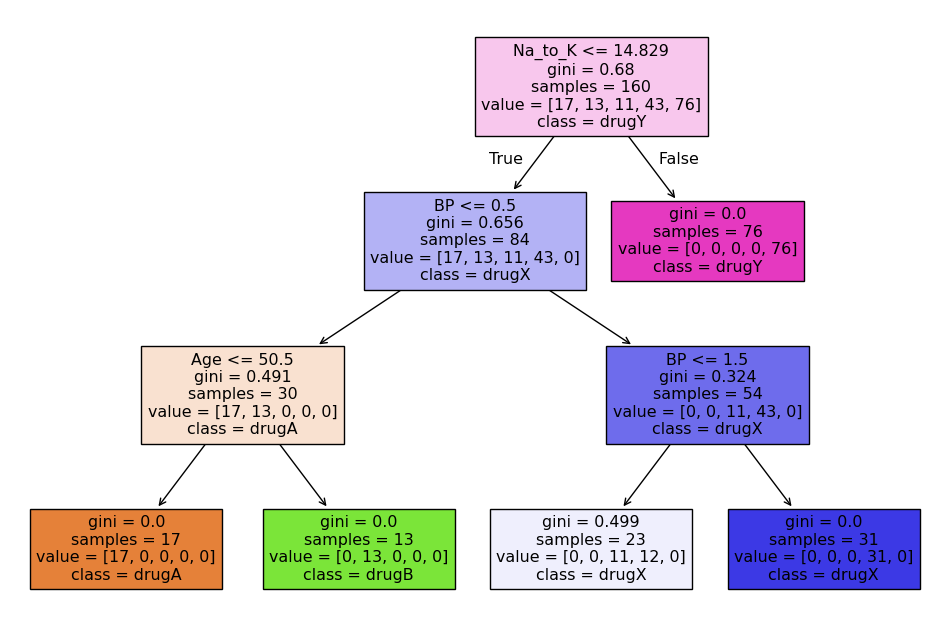

In [42]:
#Visualize Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], filled=True)
plt.show()

<h1> Bonus Assignment </h1>
<p> Explore a dataset with a higher number of features (e.g., Wine Quality
dataset).

1. Preprocess the data, handle missing values, and scale the features.

2. Train a Decision Tree Classifier and visualize the tree.

3. Evaluate the model&#39;s performance using accuracy, precision, recall,
and F1-score.
4. Experiment with hyperparameter tuning to improve performance</p>